In [1]:
import pandas as pd


In [2]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.tail()



,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [12]:
data.shape
type(data)

pandas.core.frame.DataFrame

In [13]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

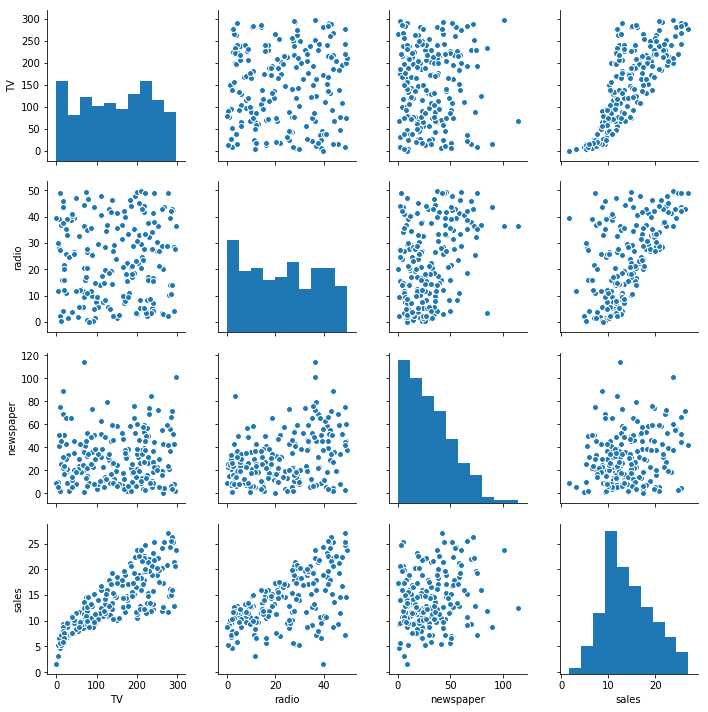

In [14]:
sns.pairplot(data)

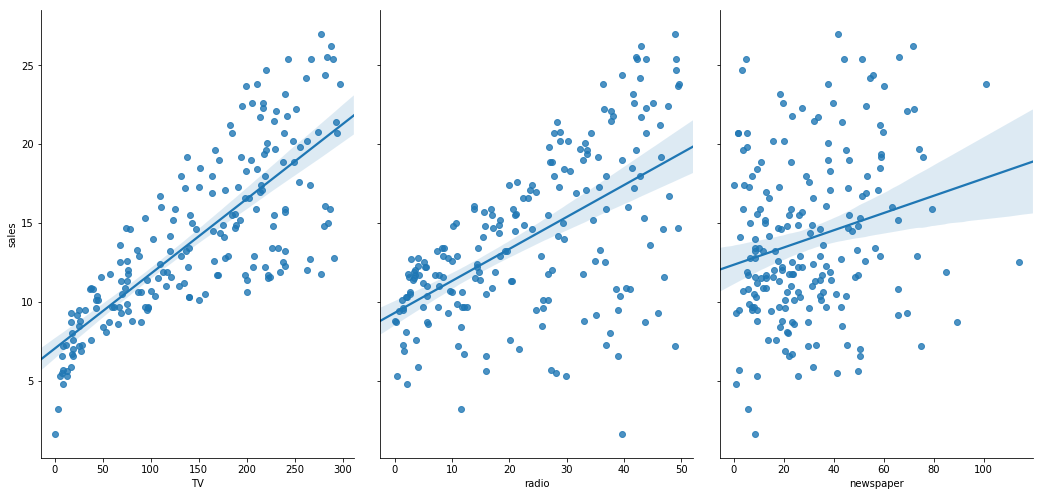

In [16]:
#need help with sns pairplot
sns.pairplot(data,x_vars=["TV","radio","newspaper"],y_vars="sales",size=7,aspect=0.7,kind= "reg" )

In [17]:
feature_cols = ["TV","radio","newspaper"]

X=data[feature_cols]
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [18]:
X.shape

(200, 3)

In [19]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [20]:
y= data["sales"]

y.head()


1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [21]:
y.shape

(200,)

In [24]:
#splitting X and y into testing and training data 
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [25]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [26]:
from sklearn.linear_model import LinearRegression

#instantiate
linreg =  LinearRegression()
linreg.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
#print intercept and coefficient 
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [28]:
#pair feature names with the coefficients
list(zip(feature_cols,linreg.coef_))

[('TV', 0.04656456787415029),
 ('radio', 0.17915812245088839),
 ('newspaper', 0.003450464711180378)]

In [30]:
#make predictions 
y_pred = linreg.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

ValueError: continuous is not supported

In [31]:
#define true  and predicted response values
true= [100, 50, 30, 20]
pred= [90, 50, 50, 30]

In [32]:
print((10+0+20+10)/4.)

from sklearn import metrics
print(metrics.mean_absolute_error(true,pred))

10.0
10.0


In [33]:
print((10**2+ 0**2 + 20**2+10**2)/4.)
print(metrics.mean_absolute_error(true,pred))

150.0
10.0


In [34]:
#calculate RMSE(root mean squared error) by hand 
import numpy as np
print(np.sqrt((10**2+0**2+20**2+10**2)/4.))

print(np.sqrt(metrics.mean_squared_error(true,pred)))

12.24744871391589
12.24744871391589


In [35]:
#calculating RMSE for sales prediction
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


1.404651423032895
